# **Import Libraries**

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **Loading Dataset**

In [2]:
# Load Dataset
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [3]:
# Show the first 10 rows
df.head(10)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39
5,TX000006,AC00393,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,D000579,117.67.192.211,M054,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 08:06:36
6,TX000007,AC00199,7.08,2023-02-15 16:36:48,Credit,Seattle,D000241,140.212.253.222,M019,ATM,37.0,Doctor,139.0,1.0,13316.71,2024-11-04 08:10:09
7,TX000008,AC00069,171.42,2023-05-08 17:47:59,Credit,Indianapolis,D000500,92.214.76.157,M020,Branch,67.0,Retired,291.0,1.0,2796.24,2024-11-04 08:10:55
8,TX000009,AC00135,106.23,2023-03-21 16:59:46,Credit,Detroit,D000690,24.148.92.177,M035,Branch,51.0,Engineer,86.0,1.0,9095.14,2024-11-04 08:11:14
9,TX000010,AC00385,815.96,2023-03-31 16:06:57,Debit,Nashville,D000199,32.169.88.41,M007,ATM,55.0,Doctor,120.0,1.0,1021.88,2024-11-04 08:06:32


In [4]:
# Review the number of rows, columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [5]:
# Display descriptive statistics
df.describe(include='all')

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2508,2516,2511.000000,2509,2507,2507,2507,2517,2514,2510,2519.000000,2514,2511.000000,2516.000000,2510.000000,2513
unique,2484,495,NaN,2485,2,43,681,591,100,3,NaN,4,NaN,NaN,NaN,360
top,TX001046,AC00362,NaN,2023-05-10 16:27:51,Debit,Fort Worth,D000697,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,2,12,NaN,2,1942,71,9,12,46,868,NaN,657,NaN,NaN,NaN,18
mean,NaN,NaN,297.656468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.678444,NaN,119.422939,1.121622,5113.438124,NaN
std,NaN,NaN,292.230367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.837359,NaN,70.078513,0.594469,3897.975861,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.310000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.727500,NaN
50%,NaN,NaN,211.360000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.000000,1.000000,4734.110000,NaN
75%,NaN,NaN,413.105000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7672.687500,NaN


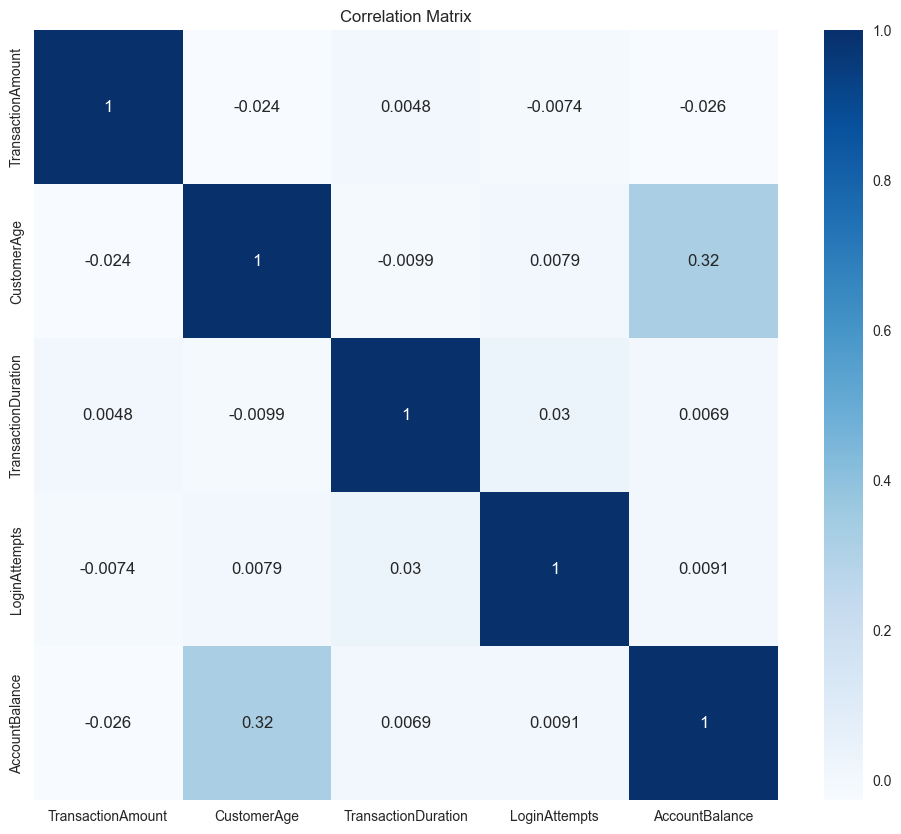

In [6]:
# Displaying correlation
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title("Correlation Matrix")
plt.show()

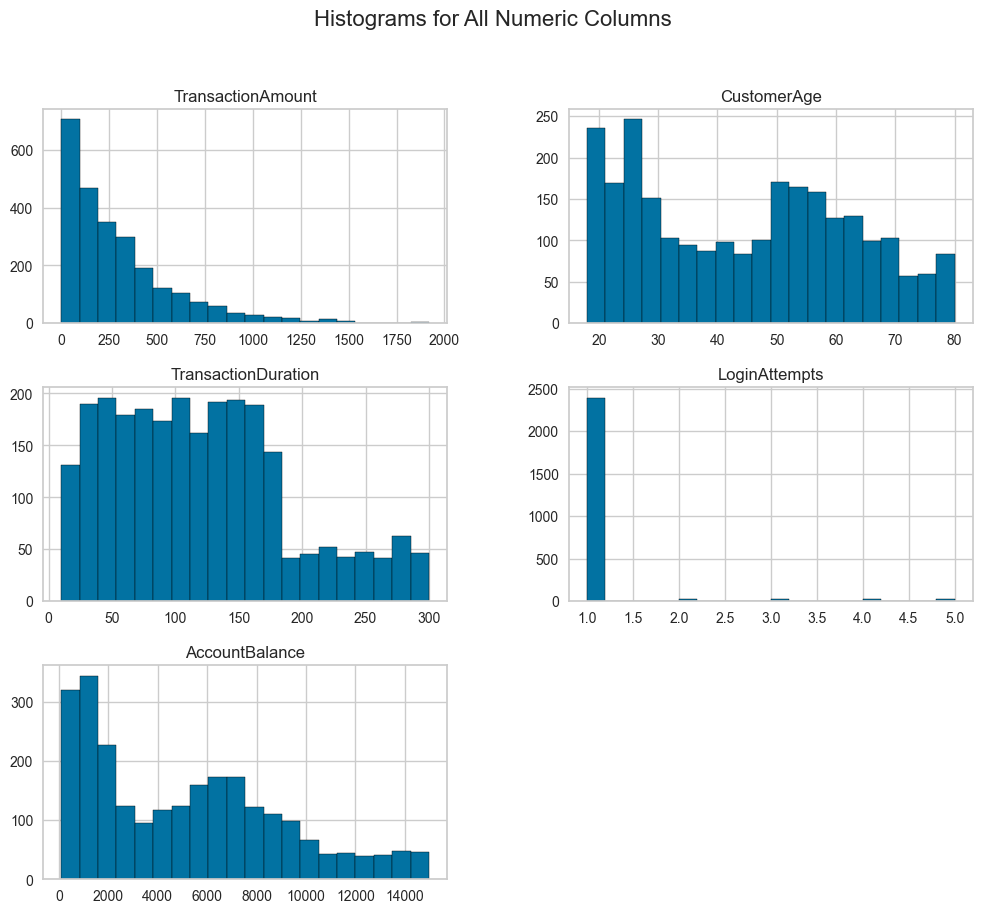

In [7]:
# Display the histogram
df.hist(bins=20, figsize=(12, 10), edgecolor='black')
plt.suptitle('Histograms for All Numeric Columns', fontsize=16)
plt.show()

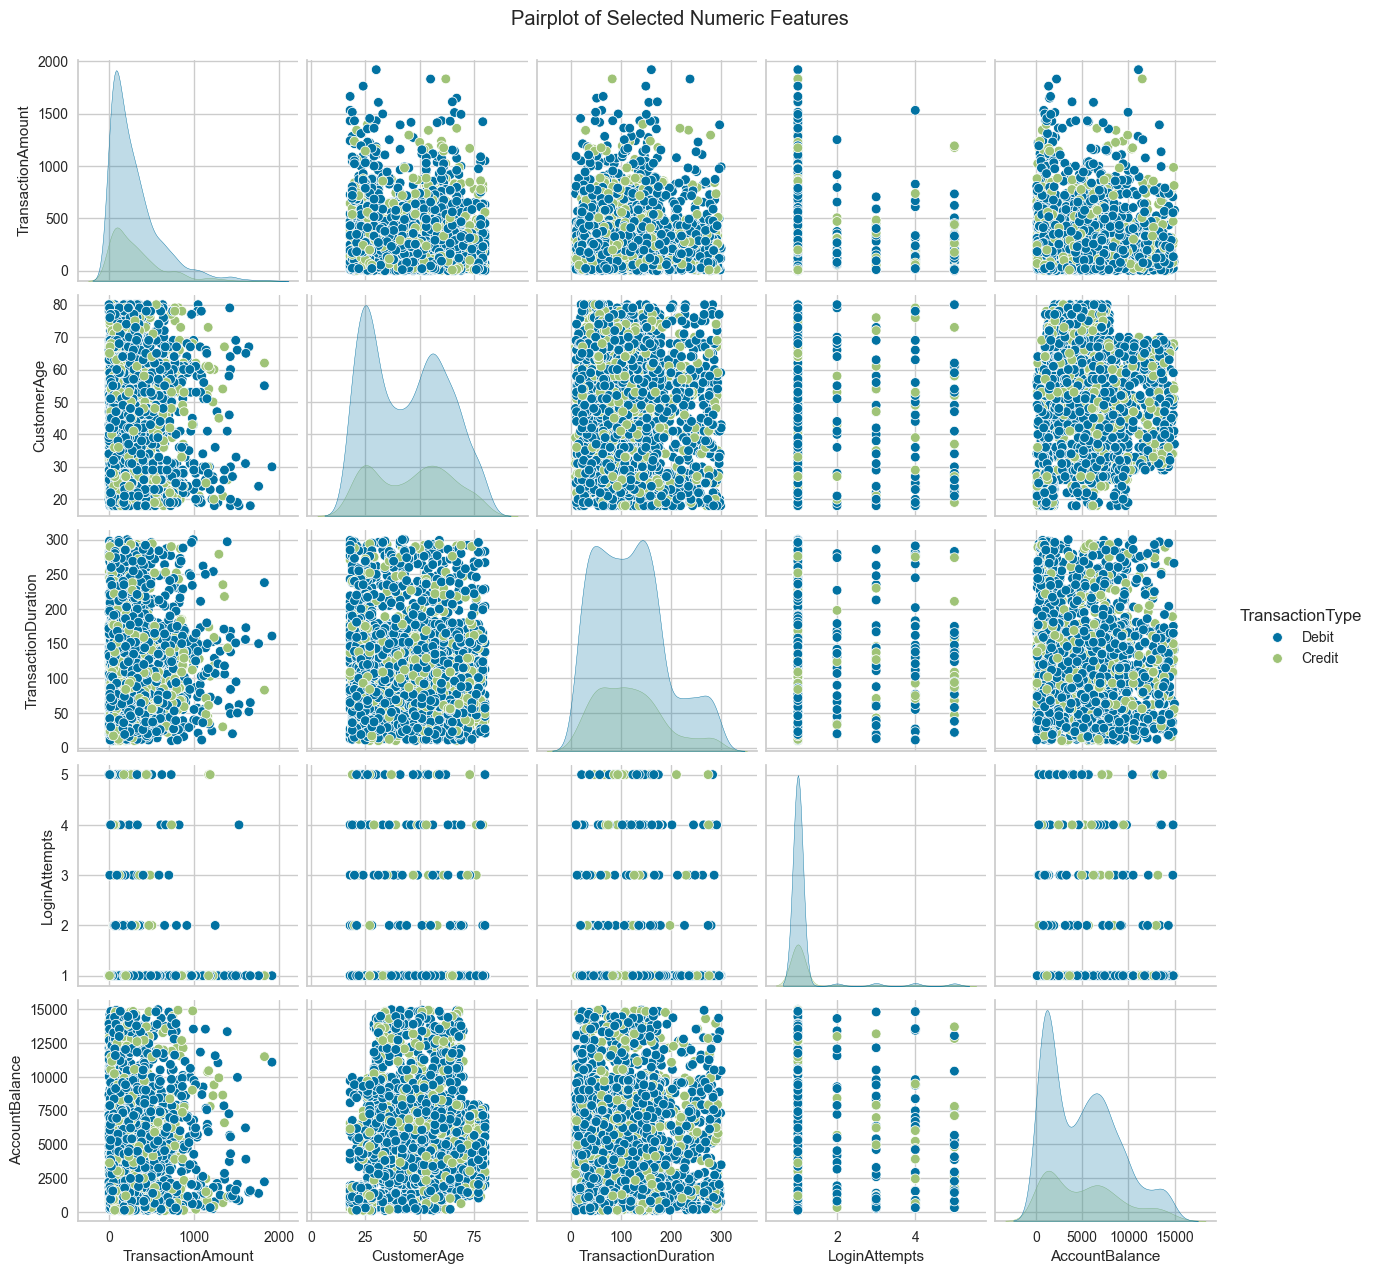

In [8]:
# Informative visualizations
numerical_cols = df.select_dtypes(include='number').columns

sns.pairplot(df, vars=numerical_cols, hue='TransactionType')
plt.suptitle("Pairplot of Selected Numeric Features", y=1.02)
plt.show()

# **Data Cleaning and Pre-Processing**

In [9]:
# Checking missung values
df.isnull().sum()

TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64

In [10]:
# Checking duplicates
df.duplicated().sum()

np.int64(21)

In [11]:
# Changing the data type
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'], errors='coerce')

In [12]:
# Handling missing data
df['TransactionDate'] = df['TransactionDate'].fillna(method='ffill')
df['PreviousTransactionDate'] = df['PreviousTransactionDate'].fillna(method='ffill')

C:\Users\nurri\AppData\Local\Temp\ipykernel_4596\2682947801.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['TransactionDate'] = df['TransactionDate'].fillna(method='ffill')
C:\Users\nurri\AppData\Local\Temp\ipykernel_4596\2682947801.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['PreviousTransactionDate'] = df['PreviousTransactionDate'].fillna(method='ffill')


In [13]:
# Performing feature extraction
df['TransactionGap'] = (df['TransactionDate'] - df['PreviousTransactionDate']).dt.total_seconds()

In [14]:
# Handling missing data
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

In [15]:
# Handling missing data
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [16]:
# Binning the data
df['CustomerAge_Bin'] = pd.qcut(
    df['CustomerAge'],
    q=3,
    labels=['Young', 'Middle', 'Old']
)

In [17]:
# Drop the column
df.drop(columns=['TransactionID', 'AccountID', 'TransactionDate', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'CustomerAge', 'LoginAttempts', 'PreviousTransactionDate'], inplace=True)

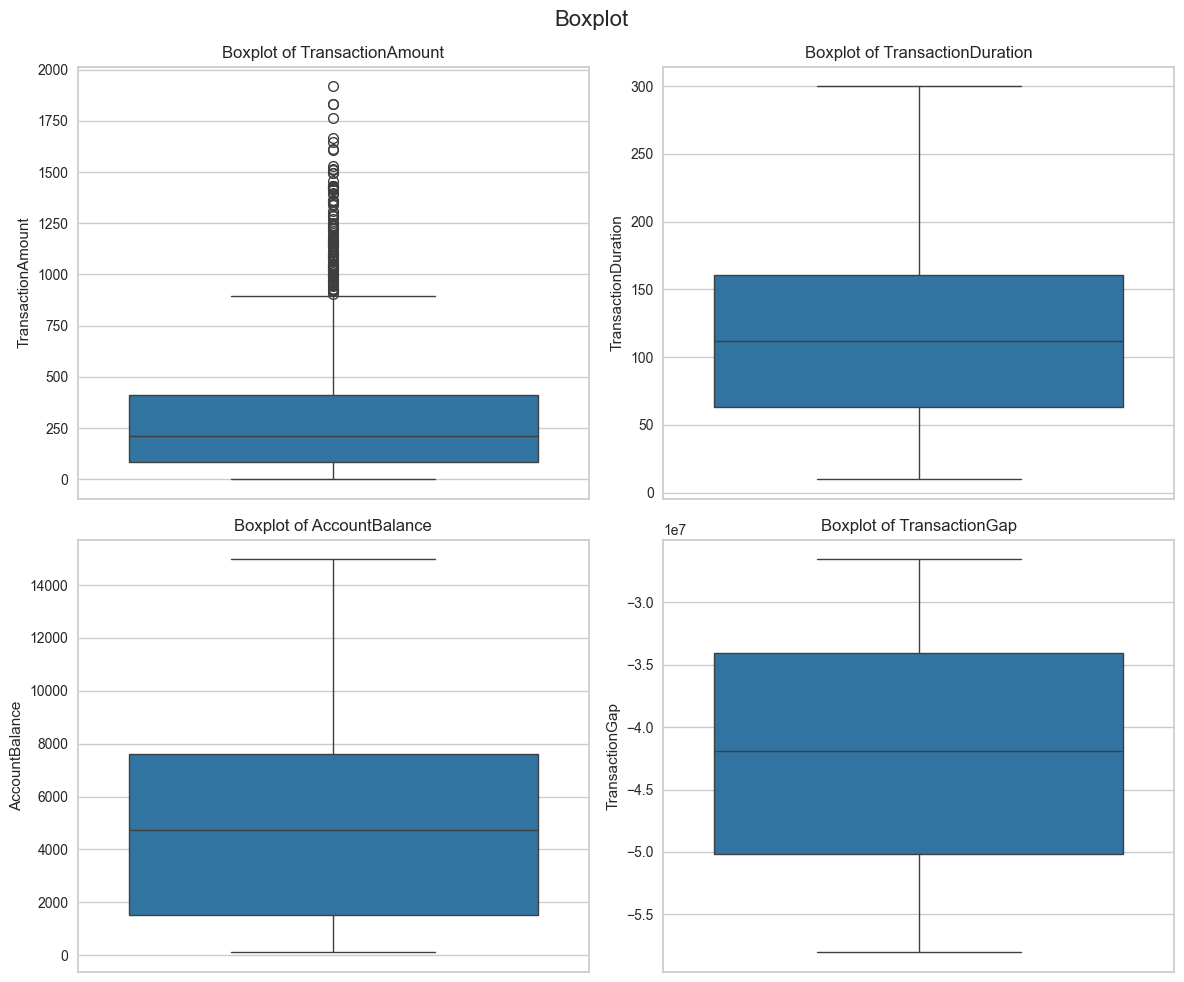

In [18]:
# Boxplot visualization
numerical_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols)//3 + 1, 2, i)
    sns.boxplot(y=df[col], color=(31/255, 119/255, 180/255))
    plt.suptitle('Boxplot', fontsize=16)
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

In [19]:
# Handling Outlier Data
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

In [20]:
# Perform feature scaling
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [21]:
# Perform feature encoding
df = pd.get_dummies(df, columns=['TransactionType', 'Channel', 'CustomerOccupation'])

In [22]:
# Perform encoder labeling
le = LabelEncoder()
df['CustomerAge_Bin'] = le.fit_transform(df['CustomerAge_Bin'])

In [23]:
# Delete duplicate data
df = df.drop_duplicates()

In [24]:
# Checking missung values
df.isnull().sum()

TransactionAmount              0
TransactionDuration            0
AccountBalance                 0
TransactionGap                 0
CustomerAge_Bin                0
TransactionType_Credit         0
TransactionType_Debit          0
Channel_ATM                    0
Channel_Branch                 0
Channel_Online                 0
CustomerOccupation_Doctor      0
CustomerOccupation_Engineer    0
CustomerOccupation_Retired     0
CustomerOccupation_Student     0
dtype: int64

In [25]:
# Checking duplicates
df.duplicated().sum()

np.int64(0)

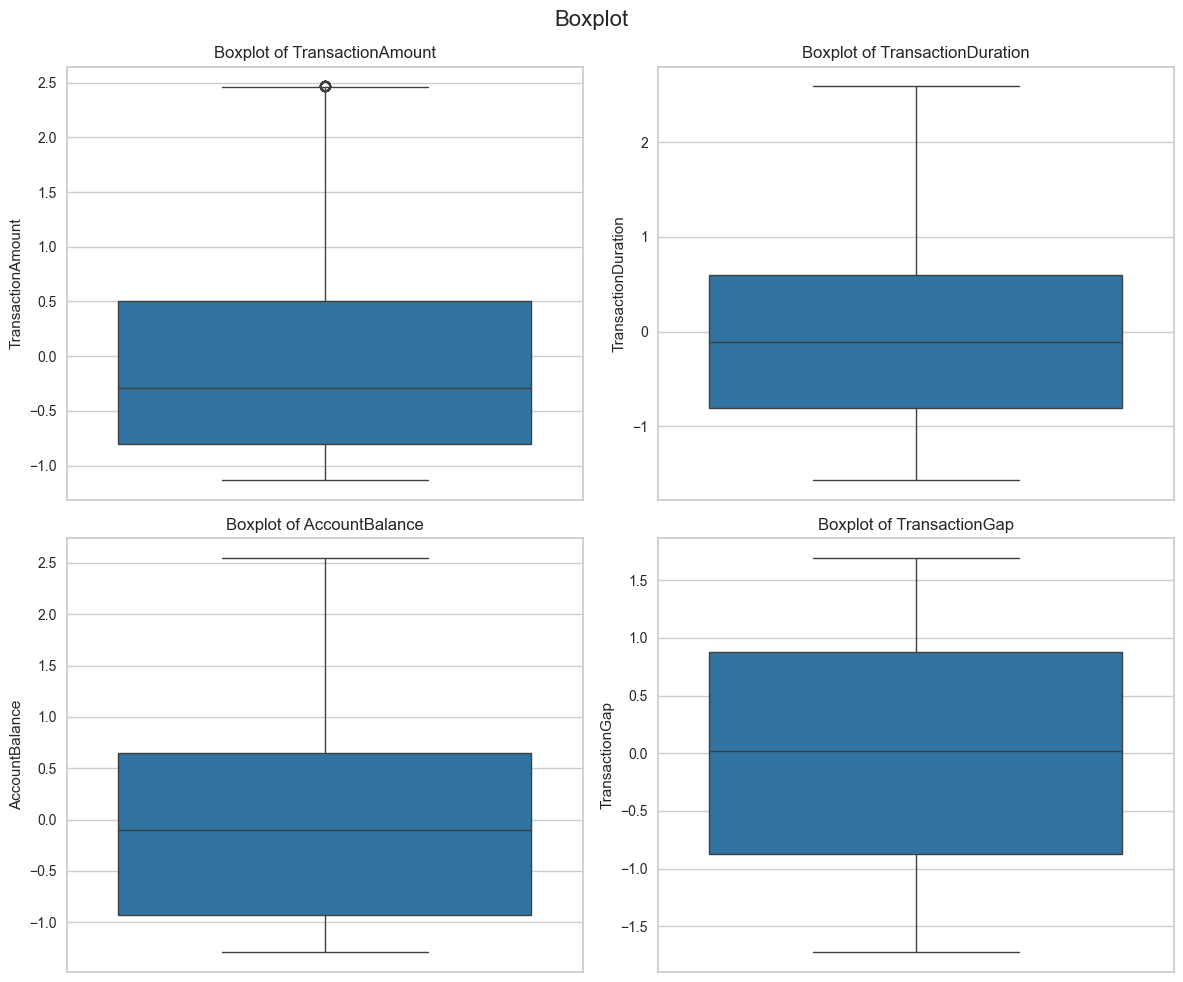

In [26]:
# Boxplot visualization
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols)//3 + 1, 2, i)
    sns.boxplot(y=df[col], color=(31/255, 119/255, 180/255))
    plt.suptitle('Boxplot', fontsize=16)
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

In [27]:
# Show the first 10 rows
df.head(10)

,TransactionAmount,TransactionDuration,AccountBalance,TransactionGap,CustomerAge_Bin,TransactionType_Credit,TransactionType_Debit,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,-1.079673,-0.550102,0.000725,-0.797050,1,False,True,True,False,False,True,False,False,False
1,0.371636,0.310623,2.231209,-0.073994,1,False,True,True,False,False,True,False,False,False
2,-0.630034,-0.908738,-1.028491,0.048681,2,False,True,False,False,True,False,False,False,True
3,-0.396759,-1.353446,0.892446,-0.571697,2,False,True,False,False,True,False,False,False,True
4,-1.082238,1.128313,0.598462,0.968663,0,True,False,False,False,True,False,False,False,True
5,-0.766849,0.755332,-1.116370,-0.871855,2,False,True,True,False,False,False,False,False,True
6,-1.107766,0.281933,2.117140,-1.313420,0,True,False,True,False,False,True,False,False,False
7,-0.449176,2.462438,-0.596698,-0.543047,1,True,False,False,True,False,False,False,True,False
8,-0.710424,-0.478375,1.028153,-0.994045,0,True,False,False,True,False,False,True,False,False
9,2.133806,0.009369,-1.054408,-0.900466,0,False,True,True,False,False,True,False,False,False


In [28]:
# Review the number of rows, columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2513 entries, 0 to 2535
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TransactionAmount            2513 non-null   float64
 1   TransactionDuration          2513 non-null   float64
 2   AccountBalance               2513 non-null   float64
 3   TransactionGap               2513 non-null   float64
 4   CustomerAge_Bin              2513 non-null   int64  
 5   TransactionType_Credit       2513 non-null   bool   
 6   TransactionType_Debit        2513 non-null   bool   
 7   Channel_ATM                  2513 non-null   bool   
 8   Channel_Branch               2513 non-null   bool   
 9   Channel_Online               2513 non-null   bool   
 10  CustomerOccupation_Doctor    2513 non-null   bool   
 11  CustomerOccupation_Engineer  2513 non-null   bool   
 12  CustomerOccupation_Retired   2513 non-null   bool   
 13  CustomerOccupation_Stud

In [29]:
# Display descriptive statistics
df.describe(include='all')

,TransactionAmount,TransactionDuration,AccountBalance,TransactionGap,CustomerAge_Bin,TransactionType_Credit,TransactionType_Debit,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
count,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000,2513,2513,2513,2513,2513,2513,2513,2513,2513
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,False,True,False,False,False,False,False,False,False
freq,NaN,NaN,NaN,NaN,NaN,1950,1950,1687,1626,1713,1884,1893,1924,1838
mean,0.000450,0.002188,0.000685,0.000063,1.010744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.000469,0.999096,1.000556,0.999712,0.824271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-1.135097,-1.568628,-1.291892,-1.726790,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,-0.802877,-0.808320,-0.926082,-0.872332,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,-0.289118,-0.105394,-0.096809,0.020250,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,0.505366,0.597532,0.653368,0.874250,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Building the Clustering Model**

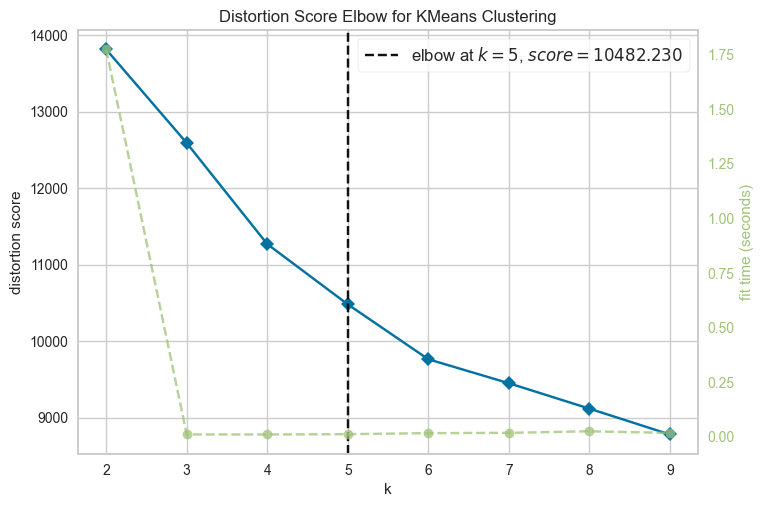

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
# Performing Elbow Method visualization
model = KMeans()

visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(df)
visualizer.show()

In [31]:
# Using K-Means Clustering algorithm
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster_KMeans'] = kmeans.fit_predict(df)

In [32]:
# Saving the model using joblib
joblib.dump(kmeans, "kmeans_model.h5")

['kmeans_model.h5']

In [33]:
# Display the Silhouette Score value
sil_score = silhouette_score(df.drop('Cluster_KMeans', axis=1), df['Cluster_KMeans'])
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.14056414978999096


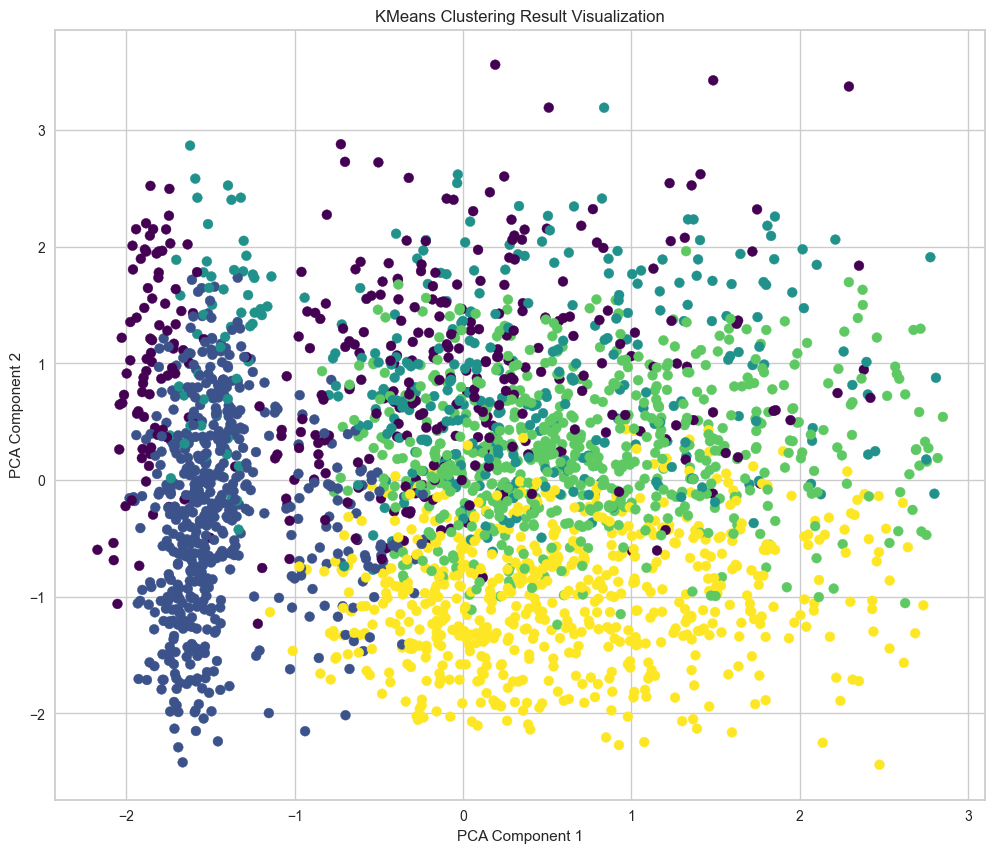

In [34]:
# Visualization of clustering results
pca = PCA(n_components=2)
components = pca.fit_transform(df.drop('Cluster_KMeans', axis=1))


plt.figure(figsize=(12, 10))
plt.scatter(components[:, 0], components[:, 1], c=df['Cluster_KMeans'], cmap='viridis', s=50)
plt.title('KMeans Clustering Result Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

In [35]:
# Building a model using PCA
df_pca = pca.fit_transform(df)

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(df_pca)

df['Cluster_PCA_KMeans'] = clusters

In [36]:
# Display the Silhouette Score value
sil_score = silhouette_score(df_pca, clusters)
print(f"Silhouette Score (PCA): {sil_score:}")

Silhouette Score (PCA): 0.4570003851260217


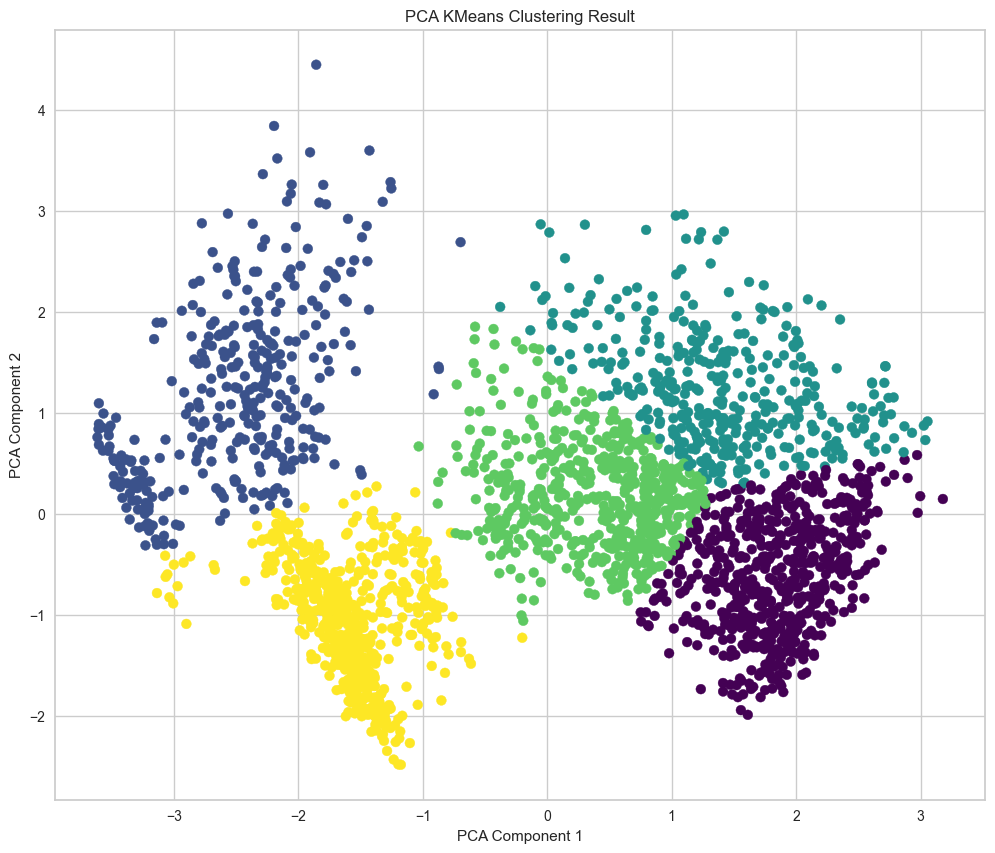

In [37]:
# Visualization of clustering results
plt.figure(figsize=(12, 10))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['Cluster_PCA_KMeans'], cmap='viridis', s=50)
plt.title('PCA KMeans Clustering Result')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

In [38]:
# Saving the model using joblib
joblib.dump(pca, "pca_model.h5")

['pca_model.h5']

# **Cluster Interpretation**

In [39]:
# Show the first 10 rows
df.head(10)

,TransactionAmount,TransactionDuration,AccountBalance,TransactionGap,CustomerAge_Bin,TransactionType_Credit,TransactionType_Debit,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student,Cluster_KMeans,Cluster_PCA_KMeans
0,-1.079673,-0.550102,0.000725,-0.797050,1,False,True,True,False,False,True,False,False,False,4,0
1,0.371636,0.310623,2.231209,-0.073994,1,False,True,True,False,False,True,False,False,False,4,2
2,-0.630034,-0.908738,-1.028491,0.048681,2,False,True,False,False,True,False,False,False,True,1,4
3,-0.396759,-1.353446,0.892446,-0.571697,2,False,True,False,False,True,False,False,False,True,4,0
4,-1.082238,1.128313,0.598462,0.968663,0,True,False,False,False,True,False,False,False,True,2,3
5,-0.766849,0.755332,-1.116370,-0.871855,2,False,True,True,False,False,False,False,False,True,1,4
6,-1.107766,0.281933,2.117140,-1.313420,0,True,False,True,False,False,True,False,False,False,4,0
7,-0.449176,2.462438,-0.596698,-0.543047,1,True,False,False,True,False,False,False,True,False,2,3
8,-0.710424,-0.478375,1.028153,-0.994045,0,True,False,False,True,False,False,True,False,False,4,0
9,2.133806,0.009369,-1.054408,-0.900466,0,False,True,True,False,False,True,False,False,False,0,1


In [40]:
# Review the number of rows, columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2513 entries, 0 to 2535
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TransactionAmount            2513 non-null   float64
 1   TransactionDuration          2513 non-null   float64
 2   AccountBalance               2513 non-null   float64
 3   TransactionGap               2513 non-null   float64
 4   CustomerAge_Bin              2513 non-null   int64  
 5   TransactionType_Credit       2513 non-null   bool   
 6   TransactionType_Debit        2513 non-null   bool   
 7   Channel_ATM                  2513 non-null   bool   
 8   Channel_Branch               2513 non-null   bool   
 9   Channel_Online               2513 non-null   bool   
 10  CustomerOccupation_Doctor    2513 non-null   bool   
 11  CustomerOccupation_Engineer  2513 non-null   bool   
 12  CustomerOccupation_Retired   2513 non-null   bool   
 13  CustomerOccupation_Stud

In [41]:
# Drop the column
df.drop(columns=['Cluster_KMeans'], inplace=True)

In [42]:
# Display descriptive analysis
numerical_cols_agg = [
    'TransactionAmount',
    'TransactionDuration',
    'AccountBalance',
]

agg_numerical = df.groupby('Cluster_PCA_KMeans')[numerical_cols_agg].agg(['mean', 'min', 'max'])

summary = pd.concat([agg_numerical], axis=1)
print(summary)

                   TransactionAmount                     TransactionDuration  \
                                mean       min       max                mean   
Cluster_PCA_KMeans                                                             
0                          -0.455710 -1.134856  1.421596           -0.408277   
1                           1.922814  0.526044  2.468270            0.040647   
2                          -0.138117 -1.134335  1.824108            0.198751   
3                          -0.335785 -1.132773  1.489363            0.346613   
4                          -0.274752 -1.135097  2.097779           -0.068255   

                                       AccountBalance                      
                         min       max           mean       min       max  
Cluster_PCA_KMeans                                                         
0                  -1.568628  1.659094       0.191030 -1.288923  2.348727  
1                  -1.568628  2.591547      -0.098921 -

In [43]:
# Display descriptive analysis
bool_cols_agg = [
    'TransactionType_Credit',
    'TransactionType_Debit',
    'Channel_ATM',
    'Channel_Branch',
    'Channel_Online',
    'CustomerOccupation_Doctor',
    'CustomerOccupation_Engineer',
    'CustomerOccupation_Retired',
    'CustomerOccupation_Student'
]

agg_bool = df.groupby('Cluster_PCA_KMeans')[bool_cols_agg].agg(lambda x: x.mode().iloc[0])
print(agg_bool)

                    TransactionType_Credit  TransactionType_Debit  \
Cluster_PCA_KMeans                                                  
0                                    False                   True   
1                                    False                   True   
2                                    False                   True   
3                                    False                   True   
4                                    False                   True   

                    Channel_ATM  Channel_Branch  Channel_Online  \
Cluster_PCA_KMeans                                                
0                         False           False           False   
1                         False           False           False   
2                         False           False           False   
3                         False           False           False   
4                         False           False           False   

                    CustomerOccupation_Doctor 

# **Exporting Data**

In [44]:
# Clustering column name changed to Target
df.rename(columns={'Cluster_PCA_KMeans': 'Target'}, inplace=True)

In [45]:
# Save Data
df.to_csv('data_clustering.csv', index=False)

In [46]:
# Inverse dataset to normal range
df[numerical_cols] = scaler.inverse_transform(df[numerical_cols])

In [47]:
# Inverse dataset to normal range
transaction_cols = [col for col in df.columns if col.startswith('TransactionType_')]
df['TransactionType'] = df[transaction_cols].idxmax(axis=1).str.replace('TransactionType_', '')

channel_cols = [col for col in df.columns if col.startswith('Channel_')]
df['Channel'] = df[channel_cols].idxmax(axis=1).str.replace('Channel_', '')

occupation_cols = [col for col in df.columns if col.startswith('CustomerOccupation_')]
df['CustomerOccupation'] = df[occupation_cols].idxmax(axis=1).str.replace('CustomerOccupation_', '')

df.drop(columns=transaction_cols + channel_cols + occupation_cols, inplace=True)

In [48]:
# Inverse dataset to normal range
df['CustomerAge_Bin'] = le.inverse_transform(df['CustomerAge_Bin'])

In [49]:
# Review the number of rows, columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2513 entries, 0 to 2535
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2513 non-null   float64
 1   TransactionDuration  2513 non-null   float64
 2   AccountBalance       2513 non-null   float64
 3   TransactionGap       2513 non-null   float64
 4   CustomerAge_Bin      2513 non-null   object 
 5   Target               2513 non-null   int32  
 6   TransactionType      2513 non-null   object 
 7   Channel              2513 non-null   object 
 8   CustomerOccupation   2513 non-null   object 
dtypes: float64(4), int32(1), object(4)
memory usage: 186.5+ KB


In [50]:
# Display descriptive analysis
numerical_cols_agg = [
    'TransactionAmount',
    'TransactionDuration',
    'AccountBalance',
]

agg_numerical = df.groupby('Target')[numerical_cols_agg].agg(['mean', 'min', 'max'])

summary = pd.concat([agg_numerical], axis=1)
print(summary)

       TransactionAmount                 TransactionDuration               \
                    mean     min     max                mean   min    max   
Target                                                                      
0             169.789576    0.32  638.24           90.886441  10.0  235.0   
1             763.310648  414.77  899.42          122.180282  10.0  300.0   
2             249.039767    0.45  738.68          133.201550  11.0  300.0   
3             199.715000    0.84  655.15          143.508803  10.0  299.0   
4             214.944649    0.26  806.97          114.588907  10.0  299.0   

       AccountBalance                     
                 mean      min       max  
Target                                    
0         5849.948559   112.76  14214.48  
1         4725.923127   106.86  14935.50  
2        10574.660646  4734.11  14977.99  
3         4938.008908   135.96  11826.52  
4         1338.086313   101.25   7835.40  


In [51]:
# Display descriptive analysis
categorical_cols_agg = [
    'CustomerAge_Bin',
    'TransactionType',
    'Channel',
    'CustomerOccupation',
]

agg_categorical = df.groupby('Target')[categorical_cols_agg].agg(lambda x: x.value_counts().index[0])

summary = pd.concat([agg_categorical], axis=1)
print(summary)

       CustomerAge_Bin TransactionType Channel CustomerOccupation
Target                                                           
0               Middle           Debit  Branch           Engineer
1                Young           Debit     ATM            Retired
2               Middle           Debit  Branch             Doctor
3                  Old           Debit  Branch            Retired
4                Young           Debit  Branch            Student


In [52]:
# Move the Target column to the end
target = df.pop('Target')
df['Target'] = target

In [53]:
# Save Data
df.to_csv('data_clustering_inverse.csv', index=False)